In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read and Write images

In [ ]:
# Read an image
img = cv2.imread('./evan.jpg') # return image as numpy array if exists else return None.
img.shape

(2092, 4800, 3)

In pycharm IDE you can use:
> `imshow(window_name, image)` to show an image.

> `waitKey(time)` to give a delay to the showed window.

> `destroyAllWindows()` close all windows.

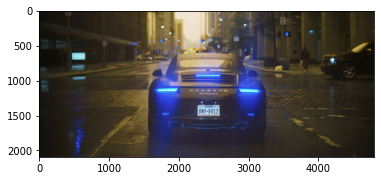

In [ ]:
plt.imshow(img)

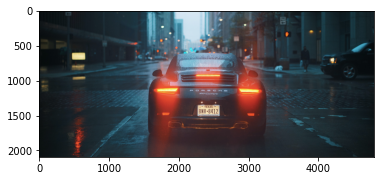

In [ ]:
# Change color space
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

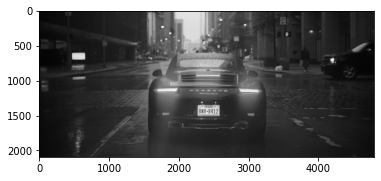

In [ ]:
img_gray = cv2.imread('./evan.jpg', 0)
plt.imshow(img_gray, cmap='gray')

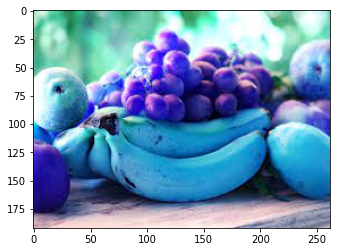

In [ ]:
# Unchanged flag
img_unchanged = cv2.imread('./fruits.jpeg', -1) # It's used for images with 4 channels
plt.imshow(img_unchanged)

To write an image use:
```python
cv2.imwrite(filename, image)
```
It returns True if the image wrote successfully.

# Anotating images
```python
# Line
cv2.line(InputOutput_image, start_point, end_point, thickness)
# Circle
cv2.circle(InputOutput_image, center_cordinates, radius, color, thickness)
# Rectangle
cv2.rectangle(InputOutput_image, start_point, end_pint, color, thickness)
# Elipse
cv2.ellipse(InputOutput_image, centerCordinates, axesLength (major, minor), angle, startAngle, endAngle, color, thickness)

```

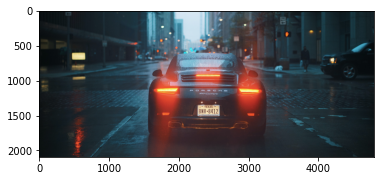

In [ ]:
img = cv2.cvtColor(cv2.imread('evan.jpg'), cv2.COLOR_BGR2RGB)
img_cp = img.copy()
plt.imshow(img)

## Drawing Elipse

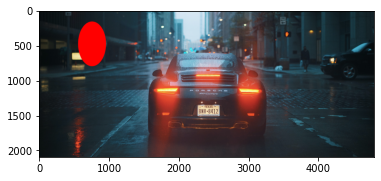

In [ ]:
cv2.ellipse(img_cp, (760, 470), (200, 320), 0, 0, 360, (255, 0, 0), -1)
plt.imshow(img_cp)

## Adding text
```python
# add text
putText(InputOutput_Image, text, org #bottom-left-corner
, font, fontScale, color, thickness)
```


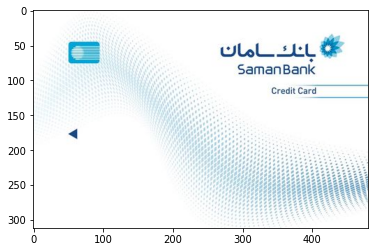

In [ ]:
card = cv2.cvtColor(cv2.imread('./saman.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(card)

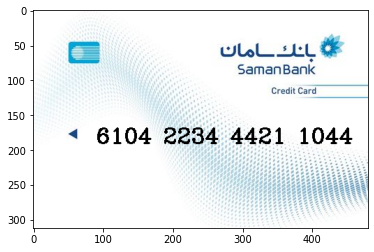

In [ ]:
numb = '6104 2234 4421 1044'
cv2.putText(card, numb, (90, 190), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
plt.imshow(card)

# Color Model

To change color space use:
```python
cv2.cvtColor(src, code)
```
* cv2.COLOR_BGR2RGB = 4.
* cv2.COLOR_BGR2GRAY = 6.

In [ ]:
def show_result(img, img_c):
  img_ch1, img_ch2, img_ch3 = cv2.split(img_c)
  fig, ax = plt.subplots(nrows=1, ncols=4)
  ax[0].imshow(cv2.cvtColor(img, 4))
  ax[1].imshow(cv2.cvtColor(img_ch1, 4))
  ax[2].imshow(cv2.cvtColor(img_ch2, 4))
  ax[3].imshow(cv2.cvtColor(img_ch3, 4))

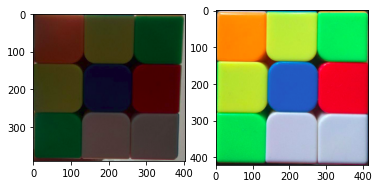

In [ ]:
# High luminance & low luminance
img_low_lum = cv2.imread('./rubik_low_lum_1.png')
img_high_lum = cv2.imread('./rubik_high_lum_1.png')

fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(cv2.cvtColor(img_low_lum, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(img_high_lum, cv2.COLOR_BGR2RGB))

## RGB Mode

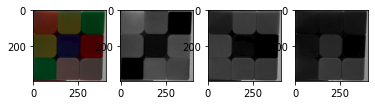

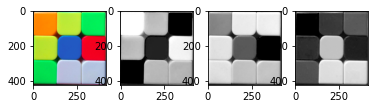

In [ ]:
img_low_RGB = cv2.cvtColor(img_low_lum, 4)
img_high_RGB = cv2.cvtColor(img_high_lum, 4)
show_result(img_low_lum, img_low_RGB)
show_result(img_high_lum, img_high_RGB)

## HSV Mode

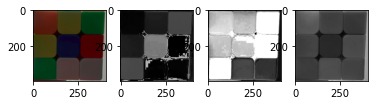

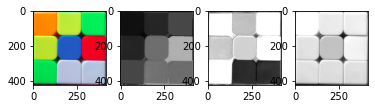

In [ ]:
img_low_HSV = cv2.cvtColor(img_low_lum, cv2.COLOR_BGR2HSV)
img_high_HSV = cv2.cvtColor(img_high_lum, cv2.COLOR_BGR2HSV)
show_result(img_low_lum, img_low_HSV)
show_result(img_high_lum, img_high_HSV)

## LAB Mode

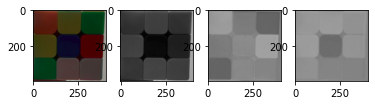

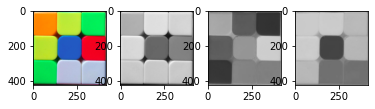

In [ ]:
img_low_LAB = cv2.cvtColor(img_low_lum, cv2.COLOR_BGR2LAB)
img_high_LAB = cv2.cvtColor(img_high_lum, cv2.COLOR_BGR2LAB)
show_result(img_low_lum, img_low_LAB)
show_result(img_high_lum, img_high_LAB)

# Thresholding
## Green space detection using color thresholding


```python
cv2.inRange(src, lowerb, upperb)
```

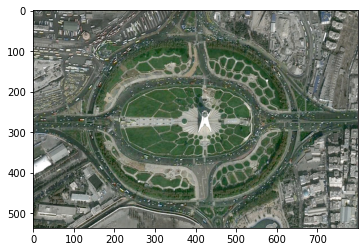

In [ ]:
img = cv2.imread('./azadi_sat.jpg')
plt.imshow(cv2.cvtColor(img, 4));

In [ ]:
# in LAB mode
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(img_lab)
print('Lower boundary:', l.min(), a.min(), b.min())
print('Upper boundary:', l.max(), a.max(), b.max())

Lower boundary: 0 96 106
Upper boundary: 255 146 170


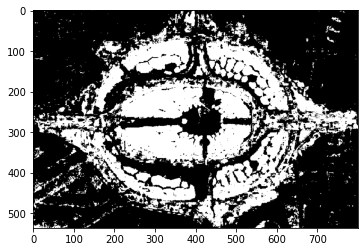

In [ ]:
lbound = (0, 0, 130)
ubound = (255, 120, 255)
img_lab_green = cv2.inRange(img_lab, lbound, ubound)
plt.imshow(img_lab_green, cmap='gray')

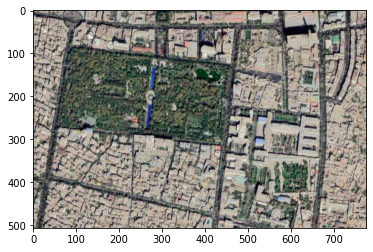

In [ ]:
sat_img = cv2.imread('./sat_1.png')
plt.imshow(cv2.cvtColor(sat_img, 4))

In [ ]:
# In HSV Mode
sat_img = cv2.cvtColor(sat_img, cv2.COLOR_BGR2HSV)
l, a, b = cv2.split(sat_img)
print('Lower boundary:', l.min(), a.min(), b.min())
print('Upper boundary:', l.max(), a.max(), b.max())

Lower boundary: 0 0 2
Upper boundary: 179 255 255


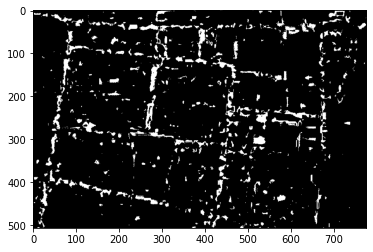

In [ ]:
lbound = (90, 0, 0)
ubound = (120, 255, 255)
sat_img_green = cv2.inRange(sat_img, lbound, ubound)
plt.imshow(sat_img_green, cmap='gray')

# Image resizing (Interpolation)

$$
\text{Scale_x} : \frac{Width_{old} - 1}{Width_{new} - 1}\\
\text{Scale_y} : \frac{Heigth_{old} - 1}{Heigth_{new} - 1}
$$

* Nearest `INTER_NEAREST`
* Linear `INTER_LINEAR` used by default
* Cubic (Bicubic) `INTER_AREA`
* Lanczos `INTER_LANCZOS4`
* Area `INTER_AREA`

Choose one of them while using `cv2.resize()` function.

```python
cv2.resize(src, dsize, fx, fy, interpolation)
```

In [ ]:
def imshow(images, figsize=(10, 5), cmap='viridis'):
  image_num = len(images)
  plt.figure(figsize=figsize)
  for i in range(image_num):
    plt.subplot(1, image_num, i+1)
    plt.imshow(images[i], cmap=cmap)

(2092, 4800, 3)


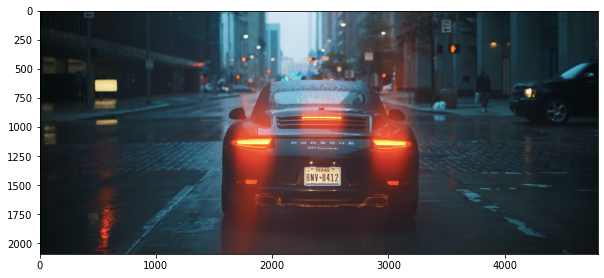

In [ ]:
evan_img = cv2.cvtColor(cv2.imread('./evan.jpg'), 4)
print(evan_img.shape)
imshow([evan_img]);

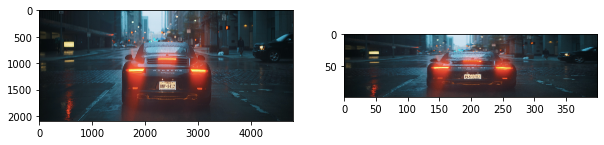

In [ ]:
# test with size
size = (400, 100)
img_down = cv2.resize(evan_img, size)
imshow([evan_img, img_down])

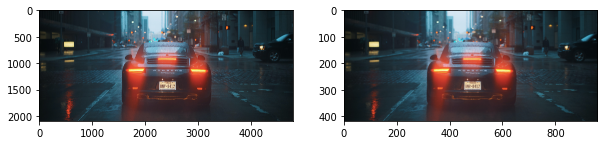

In [ ]:
# with scale factor
x_scale, y_scale = 0.2, 0.2
img_down = cv2.resize(evan_img, None, fx=x_scale, fy=y_scale)
imshow([evan_img, img_down])

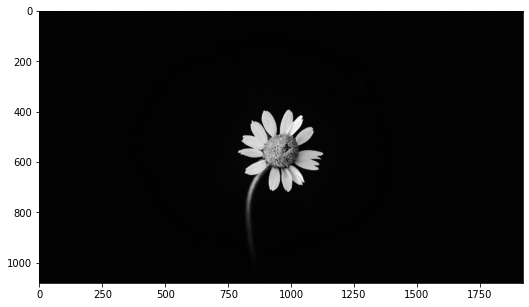

In [ ]:
# With interpolation methods
img = cv2.imread('./flower.jpg', 0)
imshow([img], cmap='gray')

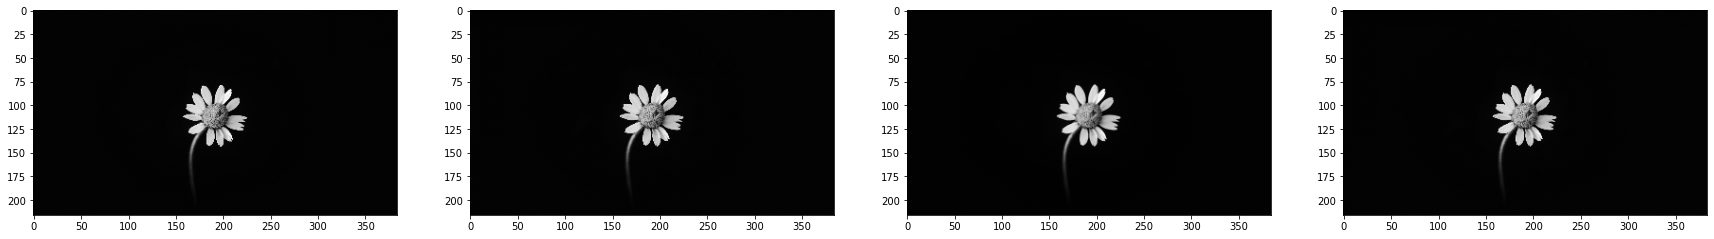

In [ ]:
img_up_nearest = cv2.resize(img, None, fx=0.2, fy=0.2, interpolation=cv2.INTER_NEAREST)
img_up_cubic = cv2.resize(img, None, fx=0.2, fy=0.2, interpolation=cv2.INTER_LINEAR)
img_up_area = cv2.resize(img, None, fx=0.2, fy=0.2, interpolation=cv2.INTER_AREA)
img_up_laczons = cv2.resize(img, None, fx=0.2, fy=0.2, interpolation=cv2.INTER_LANCZOS4)

imshow([img_up_nearest, img_up_cubic, img_up_area, img_up_laczons], figsize=(30, 30), cmap='gray')

# Edge detection

## Sobel
```python 
cv2.Sobel(src, ddepth, dx, dy, ksize)
```
✓**ddepth**: The output type, its default value is np.uint8. -1 means same as input type.

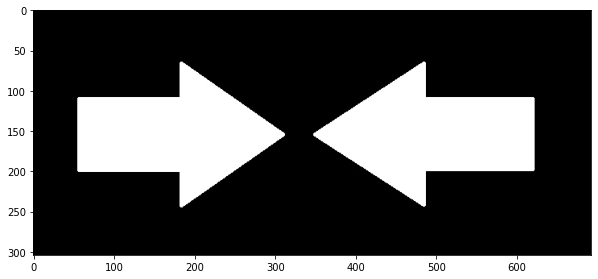

In [ ]:
img = cv2.imread('./arrows.jpg', 0)
imshow([img], cmap='gray')

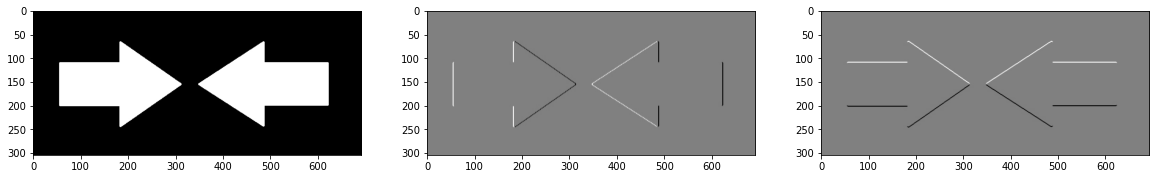

In [ ]:
img_sobel_x = cv2.Sobel(img, cv2.CV_16S, 1, 0)
img_sobel_y = cv2.Sobel(img, cv2.CV_16S, 0, 1)
imshow([img, img_sobel_x, img_sobel_y], figsize=(20, 10), cmap='gray')

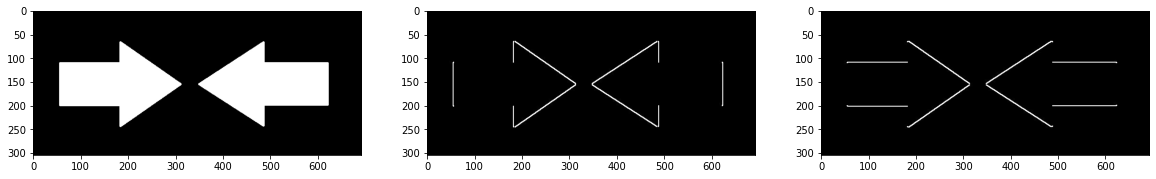

In [ ]:
# convert to numpy type to make its pixel between 0 - 255
img_sobel_x_np = cv2.convertScaleAbs(img_sobel_x)
img_sobel_y_np = cv2.convertScaleAbs(img_sobel_y)
imshow([img, img_sobel_x_np, img_sobel_y_np], figsize=(20, 10), cmap='gray')

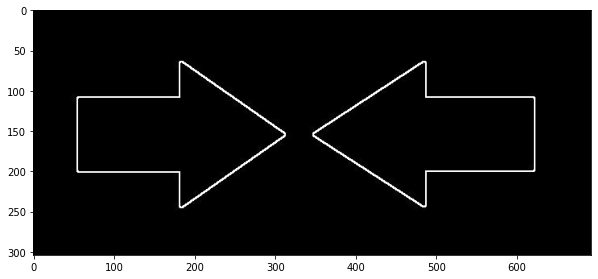

In [ ]:
# Compute magnitutde to put them together. Eauclidean norm.
img_sobel = np.hypot(img_sobel_x, img_sobel_y)
img_sobel = cv2.convertScaleAbs(img_sobel)
imshow([img_sobel], cmap='gray')

## Laplacian Kernel

```python
cv2.Laplacian(src, ddepth, ksize)
```


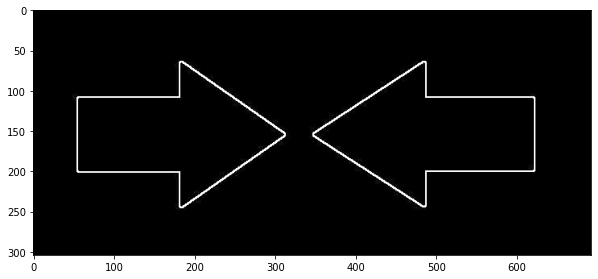

In [ ]:
img_lap = cv2.Laplacian(img, cv2.CV_16S, ksize=3)
img_lap_np = cv2.convertScaleAbs(img_lap)
imshow([img_lap_np], cmap='gray')

## Sobel Vs. Laplacian

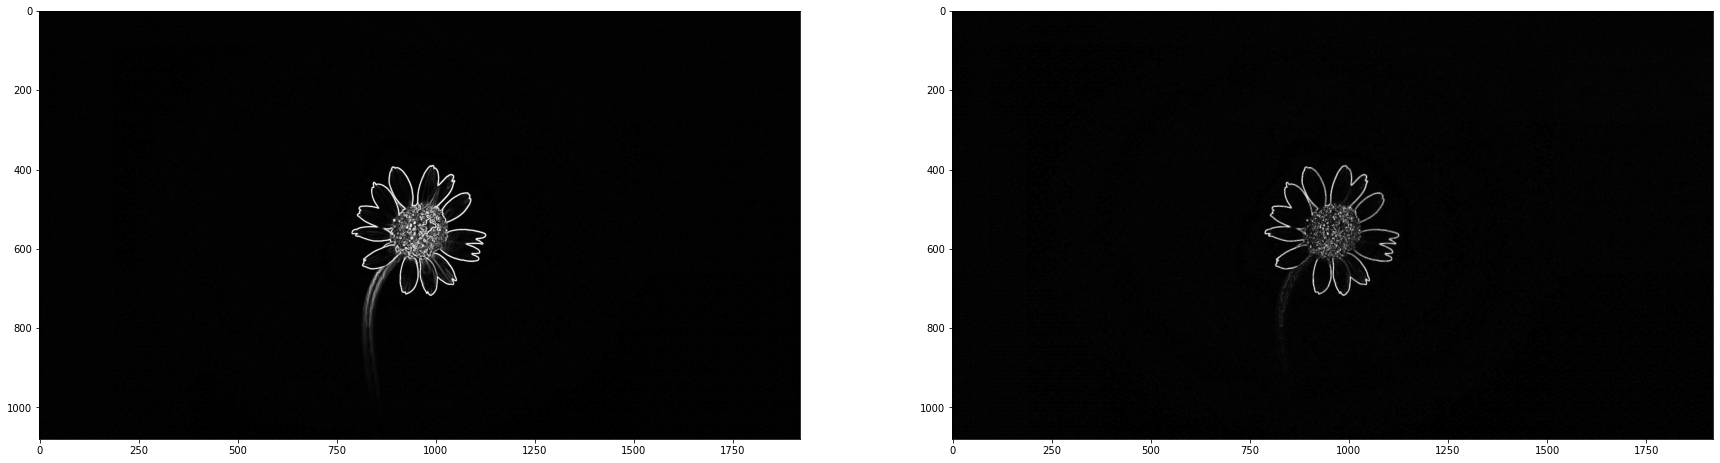

In [ ]:
img = cv2.imread('./flower.jpg', 0)

# Sobel
img_sobel_x = cv2.Sobel(img, cv2.CV_16S, 1, 0)
img_sobel_y = cv2.Sobel(img, cv2.CV_16S, 0, 1)
img_sobel = np.hypot(img_sobel_x, img_sobel_y)
img_sobel = cv2.convertScaleAbs(img_sobel)

# Laplacian
img_lap = cv2.Laplacian(img, cv2.CV_16S, ksize=3)
img_lap = cv2.convertScaleAbs(img_lap)

imshow([img_sobel, img_lap], (30, 20),cmap='gray')

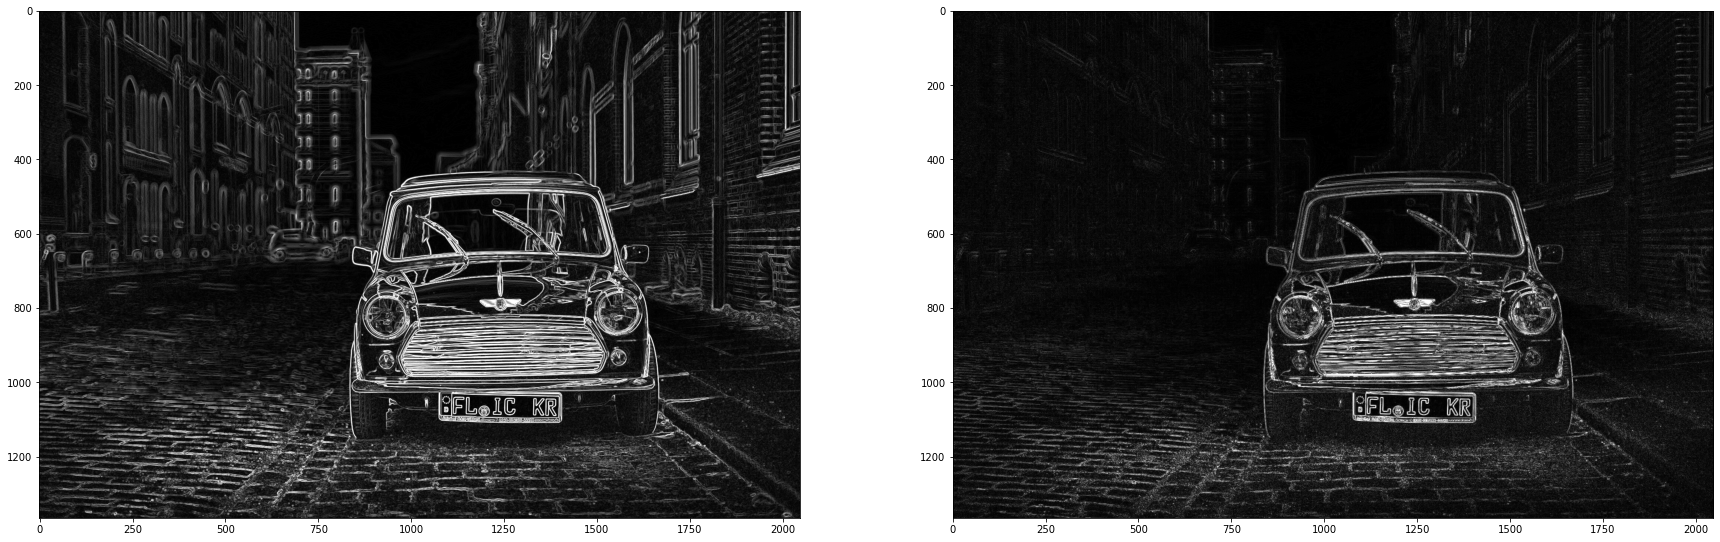

In [ ]:
img = cv2.imread('./mini.jpg', 0)

# Sobel
img_sobel_x = cv2.Sobel(img, cv2.CV_16S, 1, 0)
img_sobel_y = cv2.Sobel(img, cv2.CV_16S, 0, 1)
img_sobel = np.hypot(img_sobel_x, img_sobel_y)
img_sobel = cv2.convertScaleAbs(img_sobel)

# Laplacian
img_lap = cv2.Laplacian(img, cv2.CV_16S, ksize=3)
img_lap = cv2.convertScaleAbs(img_lap)

imshow([img_sobel, img_lap], (30, 20),cmap='gray')

## Cany
```python
cv2.Canny(image, threshold1, threshold2)
```

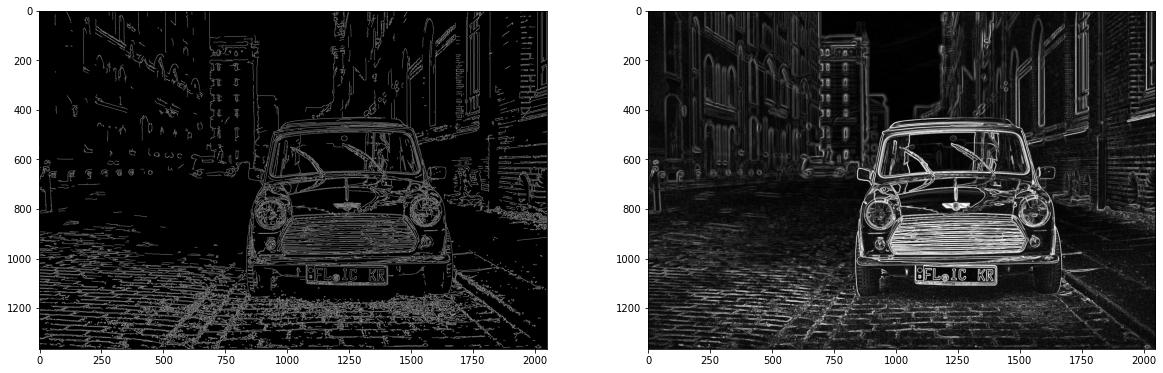

In [ ]:
img_canny = cv2.Canny(img, 50, 100)
imshow([img_canny, img_sobel], figsize=(20, 10), cmap='gray')